# Lab 2 Anatastasiia Matychenko

### Load libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from PIL import Image
import matplotlib.pyplot as plt

### Load the MNIST dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Resize the images to 32x32 using the PIL library

In [ ]:
x_train_resized = []
for img in x_train:
    img = Image.fromarray(img)
    img = img.resize((32, 32))
    img = np.array(img)
    x_train_resized.append(img)
x_train_resized = np.array(x_train_resized)

In [ ]:
x_test_resized = []
for img in x_test:
    img = Image.fromarray(img)
    img = img.resize((32, 32))
    img = np.array(img)
    x_test_resized.append(img)
x_test_resized = np.array(x_test_resized)

### Reshape the input data to 4D array

In [ ]:
x_train_resized = x_train_resized.reshape(x_train_resized.shape[0], 32, 32, 1)
x_test_resized = x_test_resized.reshape(x_test_resized.shape[0], 32, 32, 1)

### Define image size and batch size

In [ ]:
img_size = 32
batch_size = 32

### Define data augmentation

In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

### Define the input shape

In [ ]:
inputs = Input(shape=(32, 32, 1))

### Create the convolutional neural network model using functional API

In [ ]:

x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)

### Create the model

In [ ]:
model = Model(inputs=inputs, outputs=outputs)

### Compile the model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Train the model

In [ ]:
history = model.fit(train_datagen.flow(x_train_resized, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train_resized) // batch_size,
                    epochs=10,
                    validation_data=val_datagen.flow(x_test_resized, y_test, batch_size=batch_size),
                    validation_steps=len(x_test_resized) // batch_size)


### Evaluate the model on the test data

In [4]:
score = model.evaluate(test_datagen.flow(x_test_resized, y_test, batch_size=batch_size))

Epoch 1/10
1875/1875 [==============================] - 26s 13ms/step - loss: 1.2041 - accuracy: 0.5767 - val_loss: 0.3434 - val_accuracy: 0.8779
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.7311 - accuracy: 0.7515 - val_loss: 0.2113 - val_accuracy: 0.9378
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.5939 - accuracy: 0.8045 - val_loss: 0.1676 - val_accuracy: 0.9513
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.5249 - accuracy: 0.8304 - val_loss: 0.1382 - val_accuracy: 0.9567
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4744 - accuracy: 0.8483 - val_loss: 0.1352 - val_accuracy: 0.9582
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4429 - accuracy: 0.8583 - val_loss: 0.1221 - val_accuracy: 0.9593
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4157 - accuracy: 0.8686 - val_loss: 0.1159 -

### Results

In [7]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10709499567747116
Test accuracy: 0.9670000076293945


### Plot the loss and accuracy curves

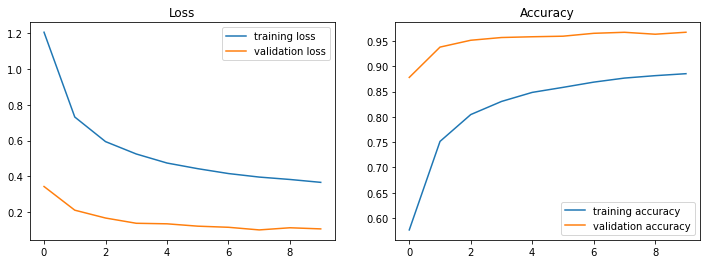

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()
